# ACCESS-NRI 2025 -- CMWG Workshop 

# Visualising ISSM Models - *Part 1*

`pyISSM` has a series of efficient visualisation tools, accessible via the `pyissm.plot` submodule. Key visualisation tools currently include:
- Mesh visualisation
- Boundary conditions
- 2D field visualisation (input and results)
- Transient results (1D and 2D)

All pyISSM visualisation capabilities leverage existing Python modules (e.g. `matplotlib` and `xarray`). Users can create complete complex and publication-ready figures using familiar syntax. By default, all `pyISSM` visualisation functions return a figure and set of axes, consistent with `matplotlib.pyplot.subplots()`. Optionally, an existing axes object can be passed to the `pyISSM` function for more refined control of plotting.

<div class="alert alert-block alert-info">
<b>AIM:</b> This notebook focuses on visualising ISSM model meshes, element/node types, and model boundary conditions using pyISSM.
</div>

In [1]:
# Import required modules
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.ticker

# Import pyISSM
# NOTE: Here, we assume that the `pyISSM` git repository has been cloned onto your machine. If `pyISSM` has been installed using `conda`, skip the `sys` calls.
import sys
import socket
hostname = socket.gethostname()
if 'gadi' in hostname:
    sys.path.append('/g/data/nf33/access-nri/pyISSM/src/')
else:
    sys.path.append('/Users/lawrence.bird/pyISSM/src/')
    import matplotlib
    matplotlib.use('MacOSX')
    %matplotlib inline
import pyissm

In [2]:
# Load an existing ISSM model onto md

if 'gadi' in hostname:
    # md = pyissm.model.io.load_model('/g/data/nf33/access-nri/CMWG_workshop_2025/sample_models/Greenland.HistoricTransient_200yr.nc')
    md = pyissm.model.io.load_model('/g/data/nf33/access-nri/CMWG_workshop_2025/sample_models/zrun_yearly_aSMB_HadGEM2_ctrl_2300_again.nc')
else:
    md = pyissm.model.io.load_model('/Users/lawrence.bird/access-dev/sampleModels/Greenland.HistoricTransient_200yr.nc')

ℹ️ Legacy classtype 'mesh2d.mesh2d' mapped to 'mesh.mesh2d'
ℹ️ Legacy classtype 'SMBforcing.SMBforcing' mapped to 'smb.default'
⚠️️ classtype does not exist for group basalforcings. Skipping...
ℹ️ Legacy classtype 'matice.matice' mapped to 'materials.ice'
ℹ️ Legacy classtype 'friction.friction' mapped to 'friction.default'
ℹ️ Legacy classtype 'timestepping.timestepping' mapped to 'timestepping.default'
ℹ️ Legacy classtype 'dsl.dsl' mapped to 'dsl.default'
ℹ️ Legacy classtype 'solidearth.solidearth' mapped to 'solidearth.earth'
⚠️ Unknown classtype verbose.verbose. Skipping...
⚠️ Unknown classtype toolkits.toolkits. Skipping...
⚠️ Unknown classtype gadi.gadi. Skipping...
ℹ️ Legacy classtype 'hydrologyshreve.hydrologyshreve' mapped to 'hydrology.shreve'
ℹ️ Legacy classtype 'calving.calving' mapped to 'calving.default'
ℹ️ Legacy classtype 'frontalforcings.frontalforcings' mapped to 'frontalforcings.default'
ℹ️ Legacy classtype 'love.love' mapped to 'love.default'
ℹ️ Legacy classtype 'm1qn

## 1. Visualise the model mesh

ISSM uses a triangular mesh that can include anistropy. To visualise this, `pyISSM` leverages the `matplotlib.pyplot.triplot` library.

Before visualising the mesh, we need to process the model to generate a compatible trinagulation object. We can efficiently extract all required components of the mesh using `pyissm.model.mesh.process_mesh()`.

Below, let's process the mesh and make a simple plot of the model mesh.

<div class="alert alert-block alert-warning">
<b>3D Models:</b> ISSM supports computation of 3D models. However, pyISSM does not yet support full-visualisation of 3D models. When visualising a 3D model, pyISSM will display the 2D projection of the mesh by default.
</div>

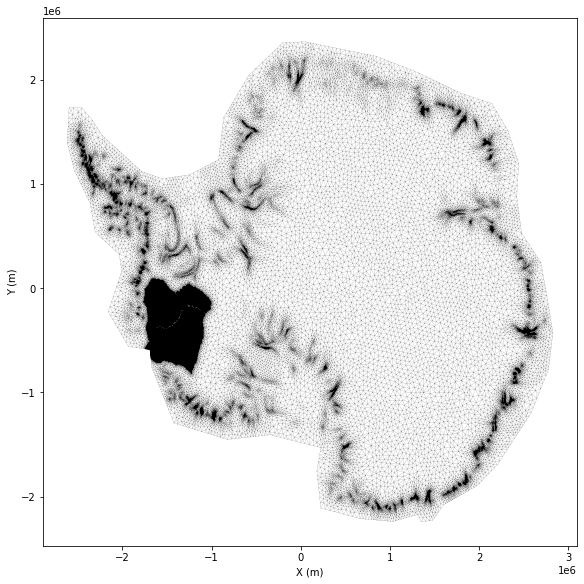

In [3]:
# Extract the mesh information from the model, creating the necessary matplotlib.tri.triangulation.Triangulation object
mesh, mesh_x, mesh_y, mesh_elements, is3d = pyissm.model.mesh.process_mesh(md)

# Visualise the model mesh (pyISSM default)
fig, ax = pyissm.plot.plot_mesh2d(mesh, figsize = (8, 8))

By default, `pyISSM` returns a Figure and Axis object, visualising the mesh, and assigns X and Y labels. We can provide custom X/Y labels directly to the `pyissm.plot.plot.mesh_2d()` function. All components of these Figure and Axis objects can be altered using standard `matplotlib` functionality.

For example, we can modify the axes labels, tick marks/units, and add a title as follows:

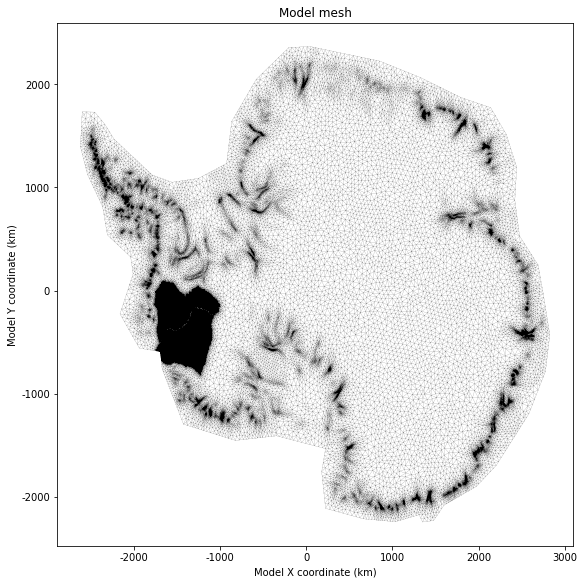

In [4]:
# Visualise the model mesh (pyISSM default)
fig, ax = pyissm.plot.plot_mesh2d(mesh,
                                  figsize = (8, 8),
                                  xlabel = 'Model X coordinate (km)',
                                  ylabel = 'Model Y coordinate (km)')

# Adjust the X/Y ticks (without changing location or extent)
formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f"{x/1000:.0f}")  # Convert m to km
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# Add title
plt.title('Model mesh')

plt.show()

We can add additional complexity to this plot by passing additional arguments to the `pyissm.plot.plot_mesh2d()` command. Below, we generate a 3 panel plot, each with additional complexity. Comments in the below cell provide a description of the functionality added to each subplot.

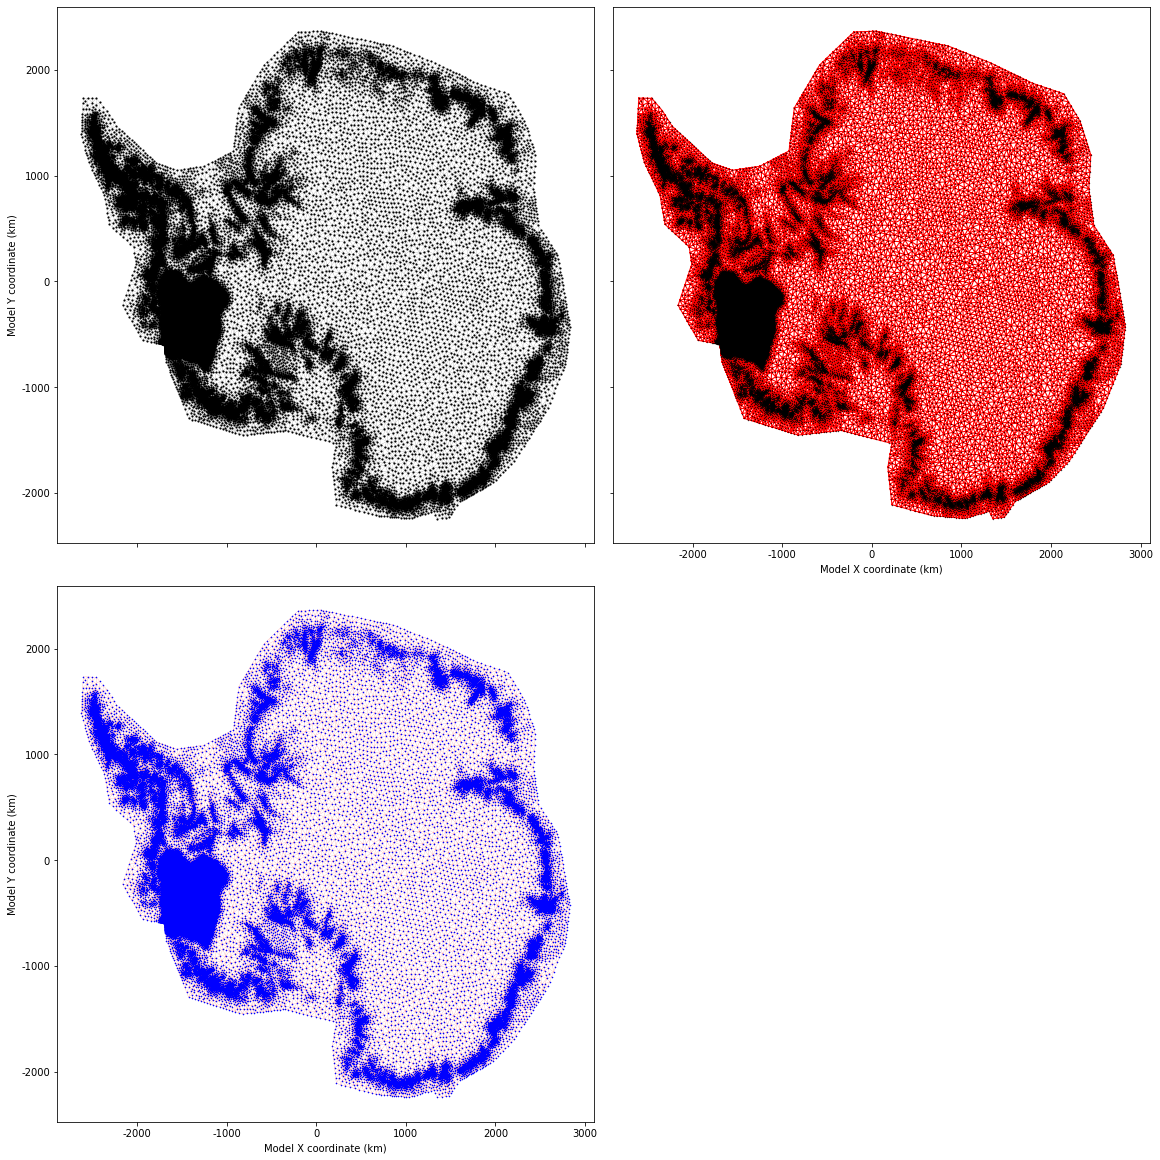

In [5]:
# Generate a 4-panel figure, with shared X/Y axes, constrained layout, and custom figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 16), sharey = True, sharex = True, constrained_layout = True)

## Panel 1
# Add 'nodes' to show the X/Y vertices defined in md.mesh.x and md.mesh.y. Provide empty xlabel to turn this off.
ax1 = pyissm.plot.plot_mesh2d(mesh,
                              ax = ax1,
                              show_nodes = True,
                              ylabel = 'Model Y coordinate (km)',
                              xlabel = '')

## Panel 2
# Change the color and thickness of the mesh lines. Change the size of the node points. Provide an empty ylabel to turn this off.
ax2 = pyissm.plot.plot_mesh2d(mesh,
                              ax = ax2,
                              show_nodes = True,
                              node_args = {'s': 0.5},
                              color = 'red',
                              linewidth = 1.1,
                              ylabel = '',
                              xlabel = 'Model X coordinate (km)')

## Panel 3
# Change the color, shape, and size of the nodes.
ax3 = pyissm.plot.plot_mesh2d(mesh,
                              ax = ax3,
                              show_nodes = True,
                              color = 'red',
                              node_args = {'color': 'blue',
                                           'marker': '*',
                                           's': 0.5},
                              ylabel = 'Model Y coordinate (km)',
                              xlabel = 'Model X coordinate (km)')

# Turn off panel 4 and add x-labels back to ax2
ax4.axis('off')
ax2.tick_params(labelbottom=True)

# Adjust the X/Y ticks (only need to adjust ax1 as all subplots share X/Y axes)
formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f"{x/1000:.0f}")  # Convert m to km
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

plt.show()

Because `pyISSM` returns `matplotlib` Figure and Axis objects, it's easy to add additional detail to the plots. Let's create a 2-panel plot with a zoomed region.

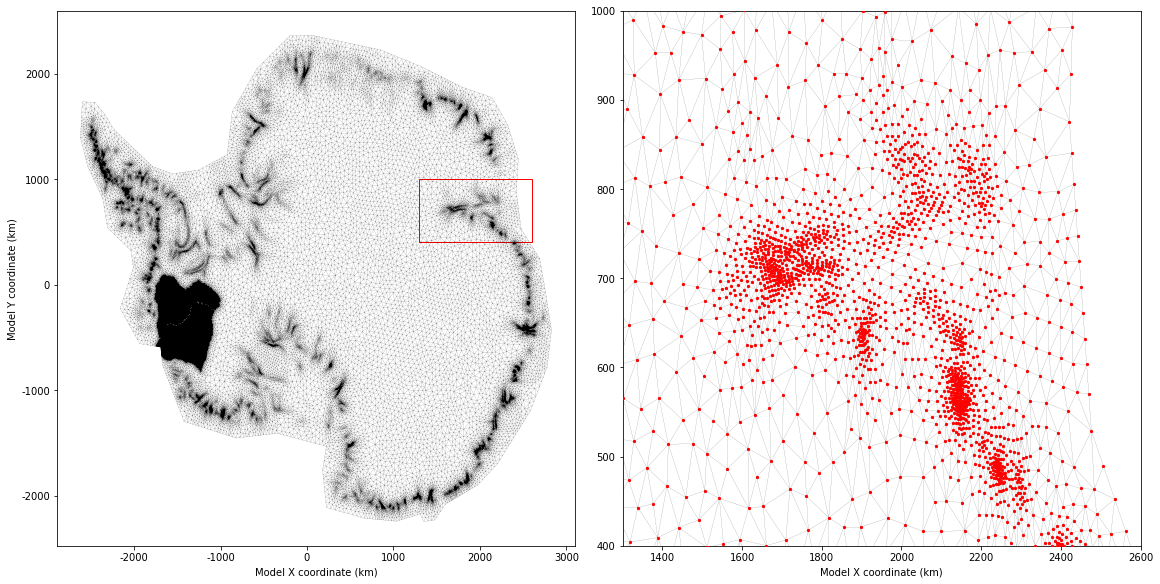

In [6]:
# Define a region for the Zoom (xmin, xmax, ymin, ymax)
zoom_region = [1.3*1e6, 2.6*1e6, 0.4*1e6, 1*1e6]

# Create a Rectangle object
rect = matplotlib.patches.Rectangle((zoom_region[0], zoom_region[2]),
                                    zoom_region[1] - zoom_region[0],
                                    zoom_region[3] - zoom_region[2],
                                    linewidth = 1,
                                    edgecolor = 'red',
                                    facecolor = 'none')

# Create 2-panel subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8), constrained_layout = True)

# Add default pyISSM mesh plot to ax1 and add Rectangle object
ax1 = pyissm.plot.plot_mesh2d(mesh,
                              ax = ax1,
                              ylabel = 'Model Y coordinate (km)',
                              xlabel = 'Model X coordinate (km)')
ax1.add_patch(rect)

# Add customised mesh plot to ax2
ax2 = pyissm.plot.plot_mesh2d(mesh,
                              ax = ax2,
                              show_nodes = True,
                              node_args = {'color': 'red',
                                           's': 20},
                              ylabel = '',
                              xlabel = 'Model X coordinate (km)')

# Adjust the X/Y limits of ax2
ax2.set_xlim(zoom_region[0], zoom_region[1])
ax2.set_ylim(zoom_region[2], zoom_region[3])

# Adjust X/Y ticks on ax1 and ax2
formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f"{x/1000:.0f}")  # Convert m to km
[ax.xaxis.set_major_formatter(formatter) for ax in [ax1, ax2]]
[ax.yaxis.set_major_formatter(formatter) for ax in [ax1, ax2]]

plt.show()

# 2. Visualise model node and element types

ISSM models use two `mask` objects to define the presence of ice and ocean:
- `md.mask.ice_levelset`: presence of ice if < 0, icefront position if = 0, no ice if > 0
- `md.mask.ocean_levelset`: presence of ocean if < 0, coastline/grounding line if = 0, no ocean if > 0

Leveraging these masks, we can identify different node/element types, including the ice-front and grounding line positions. In `pyISSM`, we can interogate different model element types using `pyissm.plot.plot_model_elements()` and different node types using `pyissm.plot.plot_model_nodes()`.

Below, let's plot different element and node types for this model.

## 2.1 Model element types

During model development, it's important to ensure that particularly the ice front is correctly defined as this has implications on boundary conditions within the model. `pyissm.plot.plot_model_elements()` can display various elements types:
- `ice_elements`: All elements that are ice covered (grounded or floating)
- `ice_front_elements`: All elements that are along the ice front
- `ocean_elements`: All elements that contain ocean (either open ocean or floating ice)
- `floating_ice_elements`: All elements that contain floating ice
- `grounded_ice_elements`: All elements that contain grounded ice
- `grounding_line_elements`: All elements that are along the grounding line

Below, let's visualise all elements that are ice covered, ocean, those along the ice front, and those along the grounding line.

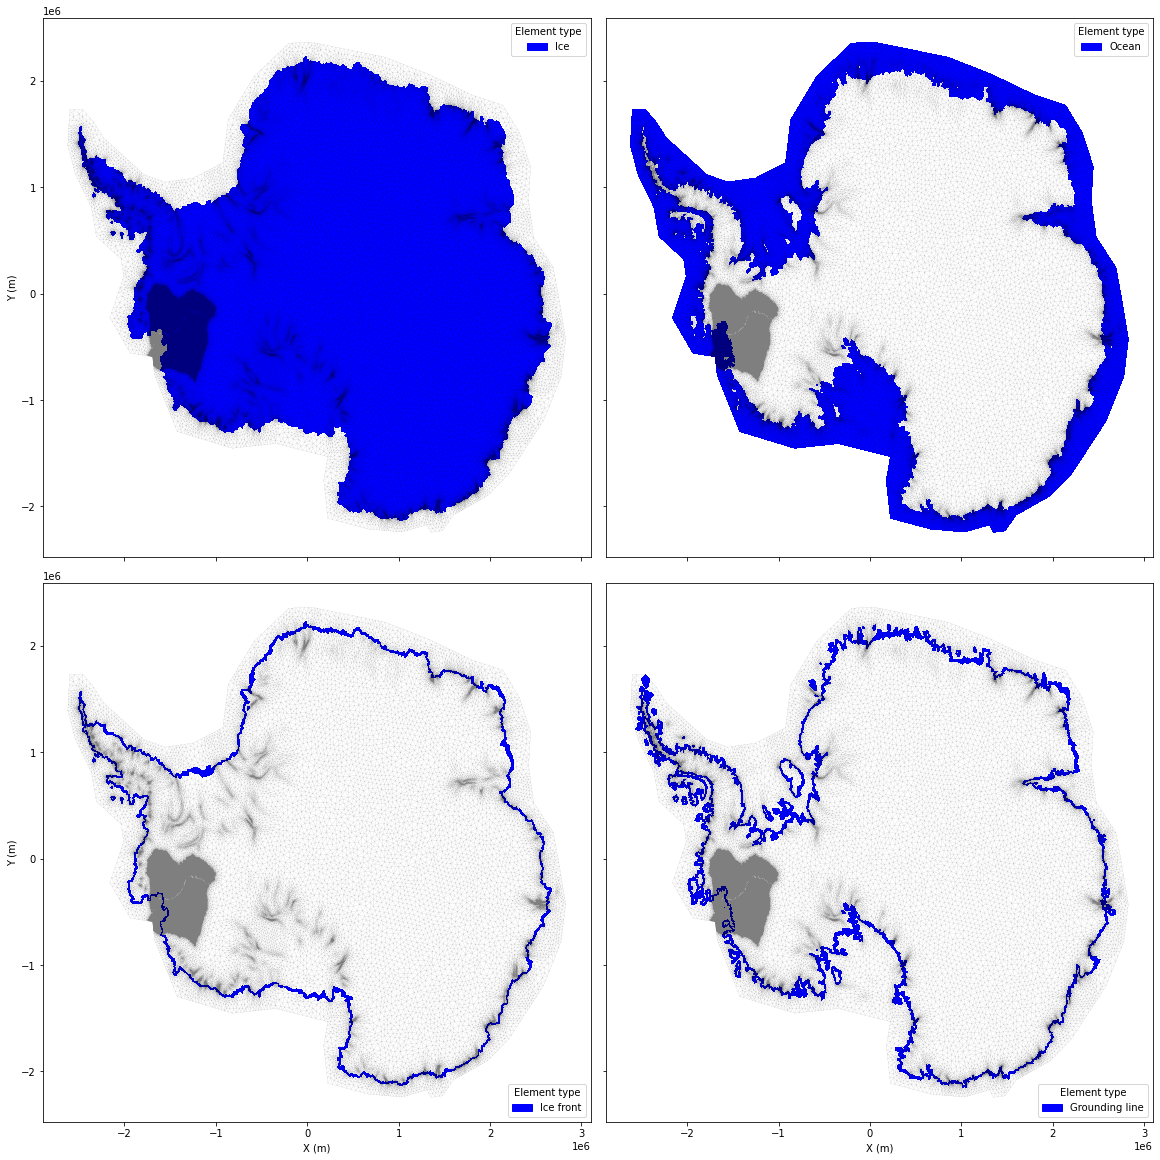

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (16, 16), constrained_layout = True)

# By default, 'ice_elements' are plotted.
ax1 = pyissm.plot.plot_model_elements(md,
                                      md.mask.ice_levelset,
                                      md.mask.ocean_levelset,
                                      ax = ax1,
                                      xlabel = '')

# Show ocean elements
ax2 = pyissm.plot.plot_model_elements(md,
                                      md.mask.ice_levelset,
                                      md.mask.ocean_levelset,
                                      type = 'ocean_elements',
                                      ax = ax2,
                                      xlabel = '',
                                      ylabel = '')

# Show elements on the ice-front.
ax3 = pyissm.plot.plot_model_elements(md,
                                      md.mask.ice_levelset,
                                      md.mask.ocean_levelset,
                                      ax = ax3,
                                      type = 'ice_front_elements',
                                      legend_args = {'loc': 'lower right'})

# Show grounding line elements.
ax4 = pyissm.plot.plot_model_elements(md,
                                      md.mask.ice_levelset,
                                      md.mask.ocean_levelset,
                                      ax = ax4,
                                      type = 'grounding_line_elements',
                                      legend_args = {'loc': 'lower right'},
                                      ylabel = '')

## 2.2 Model node types

Since `md.mask` objects are defined on vertices, it can be useful to visualise similar information to the elements above, but for the model vertices. `pyissm.plot.plot_model_nodes()` can display the following node types:
- `ice_nodes`: All nodes defined as ice
- `ice_front_nodes`: Any nodes explicitly defined as the ice front
- `ocean_nodes`: All nodes that contain ocean (either open ocean or floating ice)
- `floating_ice_nodes`: All nodes that contain floating ice
- `grounded_ice_nodes`: All nodes that contain grounded ice

Below, let's visualise all nodes that are ice covered and those that are floating.

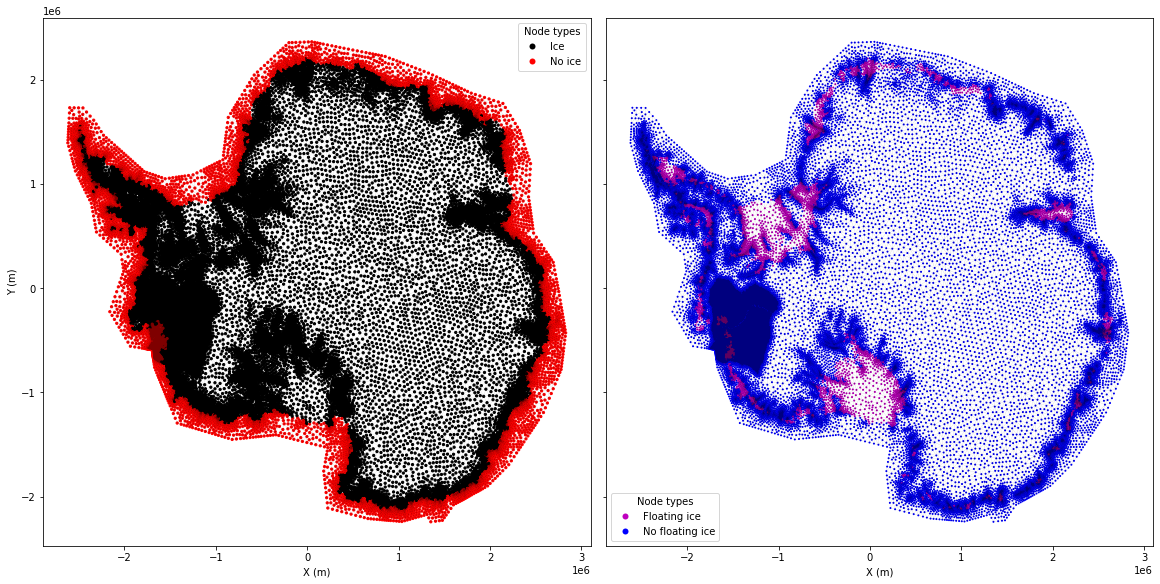

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (16, 8), constrained_layout = True)

# By default, 'ice_elements' are plotted.
ax1 = pyissm.plot.plot_model_nodes(md,
                                   md.mask.ice_levelset,
                                   md.mask.ocean_levelset,
                                   ax = ax1)

# Show elements on floating ice. Change colours and adjust legend position. Reduce size of points.
ax2 = pyissm.plot.plot_model_nodes(md,
                                   md.mask.ice_levelset,
                                   md.mask.ocean_levelset,
                                   s = 1,
                                   ax = ax2,
                                   type = 'floating_ice_nodes',
                                   colors = ['b', 'm'],
                                   legend_args = {'loc': 'lower left'},
                                   ylabel = '')

## 3. Model boundary conditions

Correctly defining boundary conditions within ISSM is critical to providing reliable model results. Boundary conditions are generally defined using parameters prepended with `spc` (e.g. `md.stressbalance.spcvx` defines x-component velocity constraints for the stressbalance). `pyissm.plot.plot_model_bc()` provides a convenient tool to visualise such boundary conditions.

Below, let's plot the boundary conditions for the stressbalance solution in ISSM.

Boundary conditions/constraints for other solutions can be plotted by providing the following types (solutions):
- `stressbalance`: Stress balance boundary conditions (Default)
- `masstransport`: Mass transport constraints
- `thermal`: Thermal constraints
- `balancethickness`: Balance thickness constraints
- `debris`: Debris constraints
- `levelset`: Levelset constraints

No constraints found in spcvz


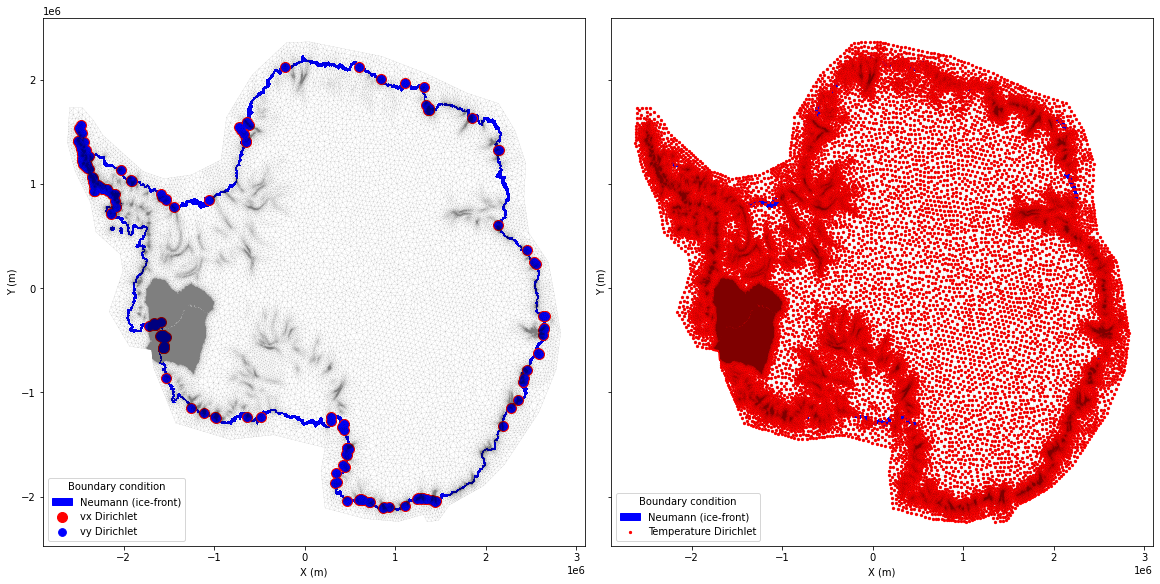

In [9]:
# By default, the stressbalance type is shown, plotting boundary conditions defined in md.stressbalance.scpvx, md.stressbalance.spxy, and md.stressbalance.spcxz
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (16, 8), constrained_layout = True)

ax1 = pyissm.plot.plot_model_bc(md,
                                ax = ax1,
                                legend_args = {'loc': 'lower left'})


# Temperature constraints in md.thermal.spctemperature can be shown using type = 'thermal'. Adjust the size of the points using scale = 1 (Default = 10)
ax2 = pyissm.plot.plot_model_bc(md,
                                ax = ax2,
                                type = 'thermal',
                                scale = 1,
                                legend_args = {'loc': 'lower left'})